In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# STATES CLEANED POST GETTING COORDINATES:
cleaned_states_no_latitude = ['NH', 'AK', 'NM', 'DE', 'WY', 'MT', 'ID', 'DC', 'MS']
# DONT ADD THESE YET AS NEED TO FIGURE OUT HOW TO GET LAT LONG STUFF FIRST
cleaned_states = ['WI', 'WV', 'WA', 'UT', 'TX', 'TN', 'SD', 'SC', 'RI', 'PA', 'OR', 'OK', 'OH', 'NC', 'NY', 'NJ', 'NV', 'NE', 'MO', 'MN', 'MI', 'MA', 'MD', 'ME', 'LA', 'KY', 'KS', 'IA', 'IN', 'IL', 'HI', 'GA', 'FL', 'CT', 'CO', 'CA', 'AZ', 'AL', 'VT']
all_states = ["AL","AK","AZ","AR","CA","CO","CT","DE","DC","FL","GA", "HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND", "OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]
not_cleaned_states = list(set(all_states)-(set(cleaned_states) | set(cleaned_states_no_latitude)))
not_cleaned_states.sort()

state_info = pd.read_pickle('../nh/data/state-data/state-info-with-extras.pkl')

In [53]:
not_cleaned_states

['AR', 'ND', 'VA']

In [54]:
# creates a dictionary of df's of each states ALFs then combines into one df
state_dfs = {}
for x in cleaned_states:
    state_dfs[x] = pd.read_csv('alf-datasets/'+x+'/'+x+'-alf-final.csv')
df = pd.concat([pd.read_csv('alf-datasets/'+x+'/'+x+'-alf-final.csv') for x in cleaned_states], ignore_index=True)

In [55]:
print('There are {} states that we have properly formatted data for. \n\nBetween these {} states there are {:,} assisted living facilities in our dataset,\nof which {:,} have labelled bed counts, or {:.2%}.\n\nOf the facilities with bed count information, we have a total of {:,} beds, or {:.2f} beds per facility.\n\nWe have county information (important for PUMA) for {:,} facilities.\nThese are the states for which we are lacking county information:\n{}\nAnd these are the states for which we are lacking bed count information:\n{}'
.format(
    len(cleaned_states),
    len(cleaned_states), 
    df.shape[0],
    df['Capacity'].notnull().sum(),
    df['Capacity'].notnull().sum() / df.shape[0],
    df['Capacity'].sum(),
    df['Capacity'].sum() / df['Capacity'].notnull().sum(),
    df['County'].notnull().sum(),
    df[~df['County'].notnull()]['State'].unique(),
    df[~df['Capacity'].notnull()]['State'].unique()
    ))

There are 39 states that we have properly formatted data for. 

Between these 39 states there are 41,966 assisted living facilities in our dataset,
of which 35,669 have labelled bed counts, or 84.99%.

Of the facilities with bed count information, we have a total of 1,155,904.0 beds, or 32.41 beds per facility.

We have county information (important for PUMA) for 36,698 facilities.
These are the states for which we are lacking county information:
['RI' 'NC' 'MI' 'MA' 'ME' 'KY' 'HI' 'FL' 'CT']
And these are the states for which we are lacking bed count information:
['WI' 'SC' '52' 'NE' 'MN' 'LA' 'KY' 'KS' 'IN' 'HI' 'FL' 'CT' 'VT']


In [56]:
print('Of the facilities with bed count information, there are {:.2f} beds per facility.\n\nUsing this number to extrapolate, we estimate that there are {:,.0f} beds accounted for in the {} states we have ALF data for.\n\nNow extrapolating to all 51 states (and DC), we estimate that there are {:,.0f} ALF beds, within our varying definition of ALF.'.format(
    df['Capacity'].sum() / df['Capacity'].notnull().sum(),
    (df['Capacity'].sum() / df['Capacity'].notnull().sum()) * df.shape[0],
    len(cleaned_states),
    (51 / len(cleaned_states)) * ((df['Capacity'].sum() / df['Capacity'].notnull().sum()) * df.shape[0])
))

Of the facilities with bed count information, there are 32.41 beds per facility.

Using this number to extrapolate, we estimate that there are 1,359,967 beds accounted for in the 39 states we have ALF data for.

Now extrapolating to all 51 states (and DC), we estimate that there are 1,778,419 ALF beds, within our varying definition of ALF.


In [57]:
# df[~df['Ownership Type'].isna()]['Ownership Type'].unique()

In [58]:
state = 'WY'
print(df[df['State'] == state]['State Facility Type 1 Literal'].unique())
print(df[df['State'] == state]['State Facility Type 2 Literal'].unique())

[]
[]


## Seeing how capacity distribution aligns with NCAL

In [59]:
capacities = df[~df['Capacity'].isna()]['Capacity'].values

(0.0, 100.0)

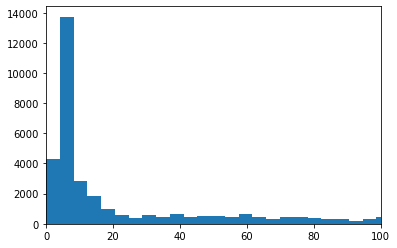

In [60]:
plt.hist(capacities, bins=300)
plt.xlim([0,100])

In [61]:
capacities.shape[0]

35669

In [62]:
(capacities > 100).sum()

3076

In [63]:
print("{:.2%} of facilities are tiny (1-3 beds)\n{:.2%} of facilities are small (4-10 beds)\n{:.2%} of facilities are medium (11-25 beds)\n{:.2%} of facilities are large (26-100 beds)\n{:.2%} of facilities are XL (100+ beds)\n".format(
    ((capacities >= 1).sum() - (capacities >= 4).sum()) / capacities.shape[0],
    ((capacities >= 4).sum() - (capacities >= 10).sum()) / capacities.shape[0],
    ((capacities >= 11).sum() - (capacities >= 26).sum()) / capacities.shape[0],
    ((capacities >= 26).sum() - (capacities >= 100).sum()) / capacities.shape[0],
    ((capacities >= 100).sum()) / capacities.shape[0]
))
print('This is a similar distribution to what the NCAL says on its Facts & Figures page, which is a good indicator that our dataset is relatively accurate.')

3.97% of facilities are tiny (1-3 beds)
47.43% of facilities are small (4-10 beds)
12.57% of facilities are medium (11-25 beds)
22.32% of facilities are large (26-100 beds)
9.42% of facilities are XL (100+ beds)

This is a similar distribution to what the NCAL says on its Facts & Figures page, which is a good indicator that our dataset is relatively accurate.


## FIGURING OUT WHICH NEW STATES WE NEED TO GET COORDINATES FOR

In [64]:
df_with_coords = pd.read_pickle('alf-datasets/national/national-dataset-1-with-coordinates.pkl')

In [65]:
df_with_coords.shape

(40508, 18)

In [66]:
# states where we updated the information
for state in cleaned_states:
    if df[df['State'] == state].shape[0] != df_with_coords[df_with_coords['State'] == state].shape[0]:
        print(state)

WI
OK
NC
MN
KY
KS
IA
HI


In [67]:
cleaned_states_no_latitude

['NH', 'AK', 'NM', 'DE', 'WY', 'MT', 'ID', 'DC', 'MS']

In [69]:
df[df['Zip Code'].isna()]['State'].unique()

array(['TN', 'OK', 'NC', 'NV', 'MA', 'ME', 'KS', 'FL'], dtype=object)

In [74]:
df.shape

(41966, 18)

In [ ]:
cleaner()